In [1]:
"""Python script for plotting histograms with the distribution of Solar system objects.
Data source: https://www.minorplanetcenter.net/iau/MPCORB.html
Format description: http://www.minorplanetcenter.org/iau/info/MPOrbitFormat.html
Dependencies installation:
python -m pip install numpy pandas matplotlib
"""

import numpy as np
import pandas as pd


PLOTS_DIR = "../../../plots/solarsystem/"
DATA_DIR = "../../../data/solarsystem/"
DATA = np.genfromtxt(
    DATA_DIR+'MPCORB.DAT.gz', usecols=(0, 1, 8, 10, 11,
                                       14, 15, 21, 22), skip_header=43,
    delimiter=(
        7, 6, 7, 5, 10,
        11, 11, 11, 11, 12,
        14, 2, 10, 6, 4,
        10, 5, 4, 4, 11,
        5, 28, 9
    ),
    dtype=[
        ("Names", "U7"), ("H", "f8"), ("G", "f8"), ("Ep", "U5"), ("M", "f8"),
        ("Peri", "f8"), ("Node", "f8"), ("i", "f8"), ("e", "f8"), ("n", "f8"),
        ("a", "f8"), ("U", "int"), ("Ref", "U10"), ("Obs", "int"), ("Opp", "int"),
        ("Arc", "U9"), ("rms", "f8"), ("p1", "U3"), ("p2", "U3"), ("Com", "U10"),
        ("Flags", "U4"), ("Desig", "U27"), ("Lastobs", "int"),
    ])


In [ ]:
ALIM = (36, 113.3)
# ALIM = (30, 550)
Filtered = DATA[DATA["a"] > ALIM[0]]
Filtered = Filtered[Filtered["a"] <= ALIM[1]]
Filtered = pd.DataFrame(Filtered)

# Filtered = Filtered[Filtered["H"].between(1.6, 5.1)]
# Get only numbered objects:
Filtered = Filtered[Filtered["Desig"].str.contains("(", regex=False)]
Filtered = Filtered.sort_values(by="H")
# Filtered = Filtered.sort_values(by="Lastobs", ascending=False)
print(f"Всего объектов: {len(Filtered)}")
print(Filtered[["H", "a", "U", "Opp", "Arc", "Desig", "Lastobs"]][:25].to_string(index=False))
# print(Filtered[["H", "a", "U", "Opp", "Arc", "Desig", "Lastobs"]].to_string(index=False))

Всего объектов: 945
    H          a  U  Opp       Arc                       Desig  Lastobs
-1.25  67.997219  2   34 1954-2025 (136199) Eris               20251114
-0.55  39.339853  0  102 1914-2025 (134340) Pluto              20251112
-0.25  45.510963  1   28 1955-2025 (136472) Makemake           20250809
 0.14  43.005689  1   31 1955-2025 (136108) Haumea             20250904
 1.84  66.895052  3   23 1985-2025 (225088) Gonggong           20250925
 2.14  39.335378  1   31 1951-2025  (90482) Orcus              20250625
 2.41  43.147667  1   33 1954-2025  (50000) Quaoar             20250728
 3.09  58.839645  3   13 2011-2025 (532037) Chiminigagua       20250222
 3.44  47.297767  2   24 1997-2025  (55565) Aya                20250404
 3.45  74.587012  3   26 1982-2025 (229762) G!kun||'homdima    20251111
 3.46  45.538821  2   26 1980-2022 (174567) Varda              20220626
 3.47  39.351013  3   23 1982-2022  (28978) Ixion              20220602
 3.50  43.477488  1   30 1954-2025  (55636) 

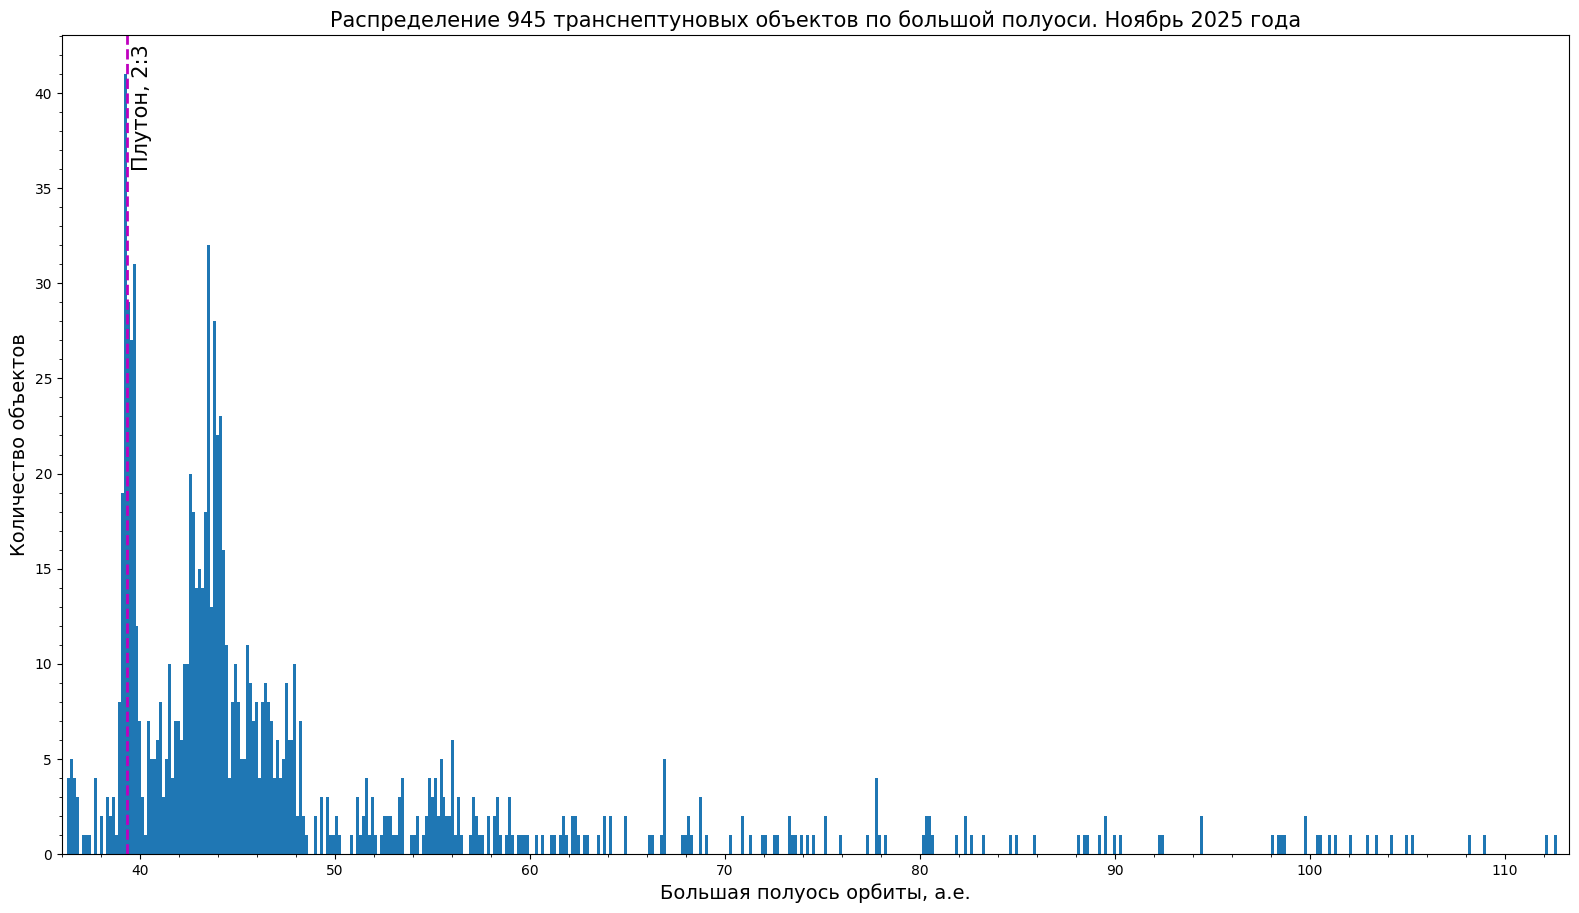

In [8]:
from datetime import datetime
import locale

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

LOC = "ru_RU"
locale.setlocale(locale.LC_ALL, LOC)
today = datetime.now()
MONTH, YEAR = today.strftime("%B"), today.year

fig, ax = plt.subplots(figsize=(16, 9))
fig.subplots_adjust(0.048, 0.06, 0.99, 0.97)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

PL = {
    "ne": {"n": "Нептун", "a": 30.07, "e": 0.01, "i": 1.77},
    "pl": {"n": "Плутон, 2:3", "a": 39.33986, "e": 0.24707, "i": 17.1758},
    "ha": {"n": "Хаумеа", "a": 43.006, "e": 0.1958, "i": 28.208},
    "mk": {"n": "Макемаке", "a": 45.4497, "e": 0.1619, "i": 29.0339},
    "er": {"n": "Эрида", "a": 67.997, "e": 0.43697, "i": 43.869},
    "go": {"n": "Гун-гун", "a": 66.8951, "e": 0.5032, "i": 30.8664},
    "qu": {"n": "Квавар", "a": 43.1629, "e": 0.03664, "i": 7.991},
    "or": {"n": "Орк", "a": 39.2892, "e": 0.22314, "i": 20.5555},
    "man": {"n": "Мани", "a": 41.621, "e": 0.148703, "i": 17.7073},
    "sal": {"n": "Салация", "a": 42.1154, "e": 0.1034, "i": 23.9271},
    "se": {"n": "Седна", "a": 506, "e": 0.85, "i": 11.93},
}

BINS = 500
# BINS = 50
plt.hist(Filtered["a"], bins=BINS)
YLIM = plt.ylim()

SHIFTX = 0.25
SHIFTY = 0.5
plt.plot([PL["pl"]["a"], PL["pl"]["a"]], YLIM, "--", c="m", lw=2)
plt.text(
    PL["pl"]["a"] + SHIFTX,
    YLIM[1] - SHIFTY,
    PL["pl"]["n"],
    c="black", rotation="vertical", va="top", fontsize=15,
)

plt.xlim(ALIM)
plt.ylim(YLIM)
plt.title(
    f"Распределение {len(Filtered)} транснептуновых объектов по большой полуоси. " +
    f"{MONTH} {YEAR} года", fontsize=15)
plt.xlabel("Большая полуось орбиты, а.е.", fontsize=14)
plt.ylabel("Количество объектов", fontsize=14)
plt.show()